In [321]:
import sys
import time

# Maths things
import numpy as np

# Plotting
import matplotlib.pyplot as plt

# Algorithm
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import umap

In [322]:
data = np.load('regression_data.npy')
target = np.loadtxt('target_values.txt')

In [323]:
error = mean_absolute_error

In [324]:
X_ltrain, X_test, Y_ltrain, Y_test = train_test_split(data, target, test_size = 100, random_state = 7)

In [325]:
from sklearn import preprocessing
X_ltrain = preprocessing.normalize(X_ltrain);
X_test =  preprocessing.normalize(X_test);

In [326]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X_ltrain, Y_ltrain, test_size = 100, random_state = 17)

In [327]:
X_train.shape

(554, 27827)

# Feature Selection

## UMAP

### Optimization of the number of PC

In [328]:
 np.arange(0,100,10)

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [329]:
%%time
numbers_pc = np.arange(1,100,1)
losses_UMAP_n_features = np.zeros((len(numbers_pc)))
for i,n_features in enumerate(numbers_pc):
    mapper = umap.UMAP(n_components=n_features ,target_metric='l1').fit(X_train, np.array(Y_train))
    T_train = mapper.transform(X_train)
    T_valid = mapper.transform(X_valid)
    lr = LinearRegression()
    lr.fit(T_train, Y_train)
    Y_pred = lr.predict(T_valid)
    loss = error(Y_valid, Y_pred)
    losses_UMAP_n_features[i] = loss
    print(n_features)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
CPU times: user 20min 27s, sys: 15.7 s, total: 20min 43s
Wall time: 16min 30s


In [330]:
optimal_index_n_features_UMAP = np.unravel_index(losses_UMAP_n_features.argmin(), losses_UMAP_n_features.shape)
optimal_n_features_UMAP = numbers_pc[optimal_index_n_features_UMAP]
print("Optimal number of n_features for UMAP using LR is {} ".format(optimal_n_features_UMAP))

Optimal number of n_features for UMAP using LR is 91 


In [331]:
losses_UMAP_n_features

array([1.53551903, 1.3115808 , 1.03604105, 0.98725145, 0.91661054,
       0.8967544 , 0.73247471, 0.81920469, 0.66198537, 0.68377142,
       0.68051216, 0.68435441, 0.69739017, 0.6590554 , 0.63476833,
       0.64303677, 0.65185357, 0.63125368, 0.65515025, 0.65437066,
       0.64225409, 0.64266167, 0.63376161, 0.64406953, 0.6610287 ,
       0.6218249 , 0.63521085, 0.62319615, 0.63086533, 0.64765486,
       0.64937752, 0.63482499, 0.65349782, 0.65423882, 0.64398355,
       0.62761014, 0.63193961, 0.6406242 , 0.62932847, 0.64283651,
       0.65681534, 0.62656872, 0.62112413, 0.63311665, 0.64492731,
       0.63332756, 0.64177452, 0.64141783, 0.62907292, 0.63423294,
       0.63692043, 0.65749712, 0.62674629, 0.63043951, 0.63574961,
       0.65713064, 0.64075759, 0.65491257, 0.64454195, 0.63402724,
       0.64285006, 0.62267089, 0.63564117, 0.65580672, 0.64059063,
       0.63746132, 0.64142554, 0.62705997, 0.651365  , 0.64493901,
       0.64754097, 0.62747153, 0.63905646, 0.66362556, 0.64134

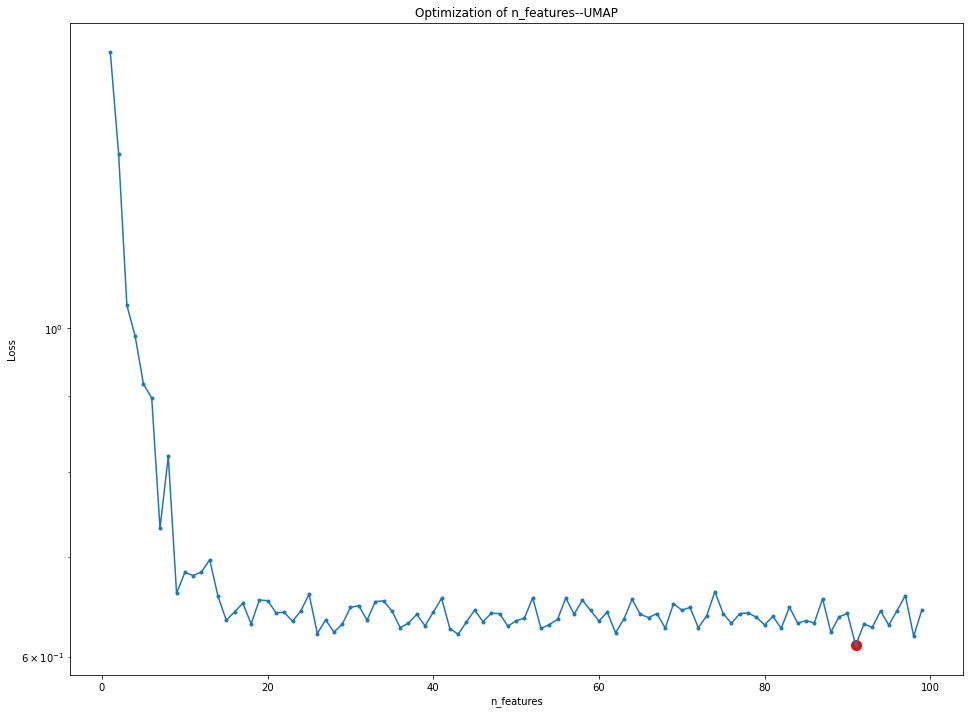

In [332]:
plt.figure(figsize=(16, 12))
plt.plot(numbers_pc,losses_UMAP_n_features,'.-')
plt.scatter(optimal_n_features_UMAP, losses_UMAP_n_features[optimal_index_n_features_UMAP], s = 100,marker='o', color='r')
plt.xlabel('n_features')
plt.yscale('log')
plt.ylabel('Loss')
#plt.legend()
plt.title('Optimization of n_features--'+'UMAP')
plt.show()

# Retrain and Map

In [333]:
best_umap = umap.UMAP(n_components=optimal_n_features_UMAP)
best_umap.fit(X_ltrain)
T_ltrain = best_umap.transform(X_ltrain)
T_train  = best_umap.transform(X_train)
T_valid  = best_umap.transform(X_valid)
T_test   = best_umap.transform(X_test)

In [334]:
'''
T_ltrain
T_train
T_valid
T_test
'''

'\nT_ltrain\nT_train\nT_valid\nT_test\n'

# Try different regression models

## Linear Regression

### No need for optimization

### Learning Curve

In [335]:
T_ltrain.shape

(654, 91)

In [336]:
lr = LinearRegression()
numbers_train = np.arange(54,655,50)
losses_lr = np.zeros((len(numbers_train)))

In [337]:
%%time
for i,n in enumerate(numbers_train):
    Tt_train = T_ltrain[:n]
    Yt_train = Y_ltrain[:n]
    lr.fit(Tt_train,Yt_train)
    Y_pred = lr.predict(T_test)
    loss = error(Y_test, Y_pred)
    losses_lr[i] = loss
    print('Number of traning:',numbers_train[i])

Number of traning: 54
Number of traning: 104
Number of traning: 154
Number of traning: 204
Number of traning: 254
Number of traning: 304
Number of traning: 354
Number of traning: 404
Number of traning: 454
Number of traning: 504
Number of traning: 554
Number of traning: 604
Number of traning: 654
CPU times: user 120 ms, sys: 46 µs, total: 120 ms
Wall time: 30.6 ms


In [338]:
optimal_index_loss_lr = np.unravel_index(losses_lr.argmin(), losses_lr.shape)
optimal_n_train_lr = numbers_train[optimal_index_loss_lr]
min_loss_lr = losses_lr[optimal_index_loss_lr]
print("Minimum loss of LR with UMAP is {} when number of train is {}  ".format(min_loss_lr,optimal_n_train_lr))

Minimum loss of LR with UMAP is 1.3469949057437498 when number of train is 654  


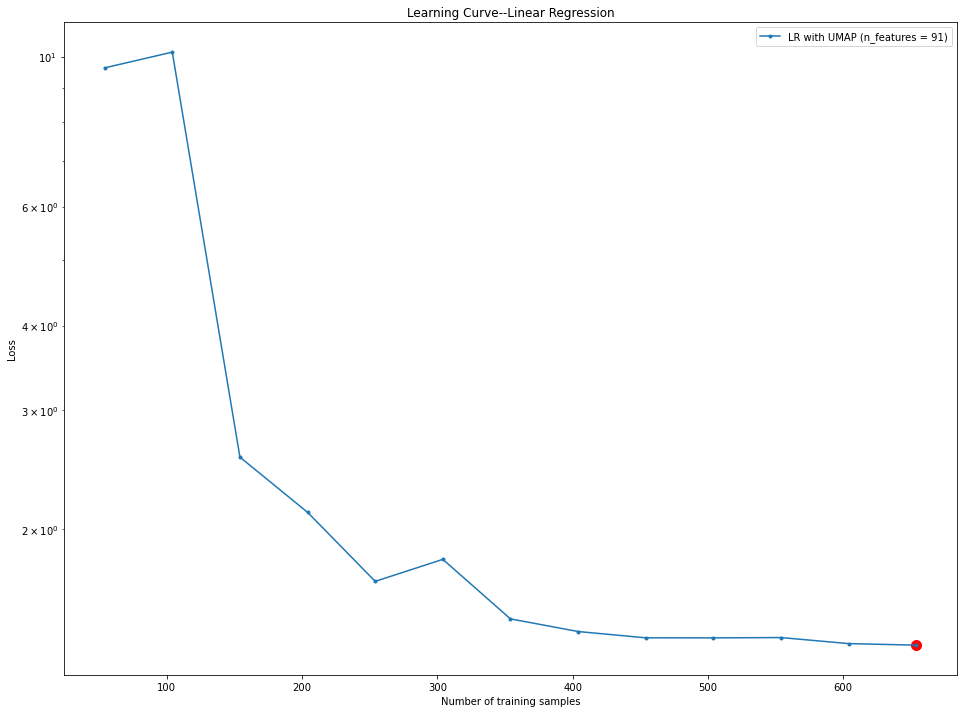

In [339]:
plt.figure(figsize=(16, 12))
plt.plot(numbers_train,losses_lr,'.-', label='LR with UMAP (n_features = {})'.format(optimal_n_features_UMAP))
plt.scatter(optimal_n_train_lr, min_loss_lr, s = 100,marker='o', color='r')
plt.xlabel('Number of training samples')
plt.yscale('log')
plt.ylabel('Loss')
plt.legend()
plt.title('Learning Curve--'+'Linear Regression')
plt.show()

## Ridge Regression

### Optimization

#### Optimization of alpha

In [340]:
%%time
alphas =  np.logspace(-10, 1, 23)
losses_rr_alpha = np.zeros((len(alphas)))
for i,alpha in enumerate(alphas):
    rr = Ridge(alpha = alpha)
    rr.fit(T_train, Y_train)
    Y_pred = rr.predict(T_valid)
    loss = error(Y_valid, Y_pred)
    losses_rr_alpha[i] = loss
    print(alpha)

1e-10
3.1622776601683795e-10
1e-09
3.1622776601683795e-09
1e-08
3.162277660168379e-08
1e-07
3.162277660168379e-07
1e-06
3.162277660168379e-06
1e-05
3.1622776601683795e-05
0.0001
0.00031622776601683794
0.001
0.0031622776601683794
0.01
0.03162277660168379
0.1
0.31622776601683794
1.0
3.1622776601683795
10.0
CPU times: user 114 ms, sys: 7.98 ms, total: 122 ms
Wall time: 30.8 ms


/home/s/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.58762e-09): result may not be accurate.
  overwrite_a=True).T
/home/s/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.58762e-09): result may not be accurate.
  overwrite_a=True).T
/home/s/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.58762e-09): result may not be accurate.
  overwrite_a=True).T
/home/s/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.58762e-09): result may not be accurate.
  overwrite_a=True).T
/home/s/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.58762e-09): result may not be accurate.
  overwrite_a=True).T
/home/s/anaconda3/lib/python3.7/site-packages

In [341]:
optimal_index_alpha_rr = np.unravel_index(losses_rr_alpha.argmin(), losses_rr_alpha.shape)
optimal_alpha_rr = alphas[optimal_index_alpha_rr]
print("Optimal alpha for RR with UMAP is {} ".format(optimal_alpha_rr))

Optimal alpha for RR with UMAP is 0.03162277660168379 


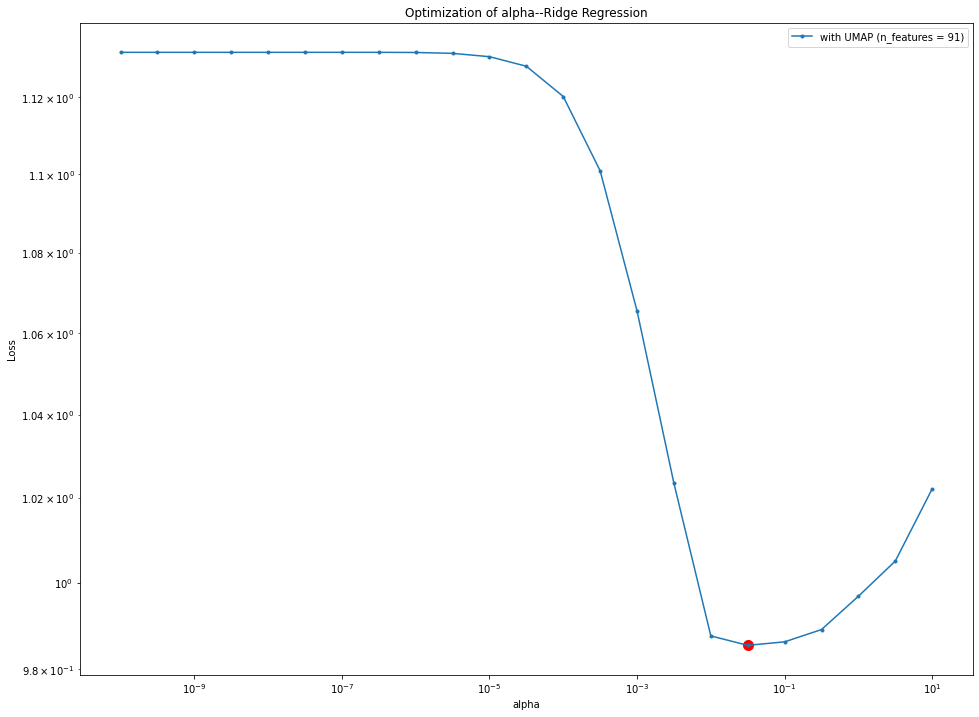

In [342]:
plt.figure(figsize=(16, 12))
plt.plot(alphas,losses_rr_alpha,'.-', label='with UMAP (n_features = {})'.format(optimal_n_features_UMAP))
plt.scatter(optimal_alpha_rr, losses_rr_alpha[optimal_index_alpha_rr], s = 100,marker='o', color='r')
plt.xlabel('alpha')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Loss')
plt.legend()
plt.title('Optimization of alpha--'+'Ridge Regression')
plt.show()

### Learning Curve

In [343]:
best_rr = Ridge(alpha = optimal_alpha_rr)
numbers_train = np.arange(54,655,50)
losses_rr = np.zeros((len(numbers_train)))

In [344]:
%%time
for i,n in enumerate(numbers_train):
    Tt_train = T_ltrain[:n]
    Yt_train = Y_ltrain[:n]
    best_rr.fit(Tt_train,Yt_train)
    Y_pred = best_rr.predict(T_test)
    loss = error(Y_test, Y_pred)
    losses_rr[i] = loss
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
CPU times: user 50.7 ms, sys: 7.99 ms, total: 58.7 ms
Wall time: 15 ms


In [345]:
losses_rr

array([1.87862258, 0.91809405, 0.92551057, 0.91696494, 0.93191724,
       0.91368055, 0.92188522, 0.94570488, 0.9350747 , 0.90994393,
       0.90702196, 0.89471388, 0.90013633])

In [346]:
optimal_index_loss_rr = np.unravel_index(losses_rr.argmin(), losses_rr.shape)
optimal_n_train_rr = numbers_train[optimal_index_loss_rr]
min_loss_rr = losses_rr[optimal_index_loss_rr]
print("Minimum loss of RR with UMAP is {} when number of train is {}  ".format(min_loss_rr,optimal_n_train_rr))

Minimum loss of RR with UMAP is 0.8947138779317578 when number of train is 604  


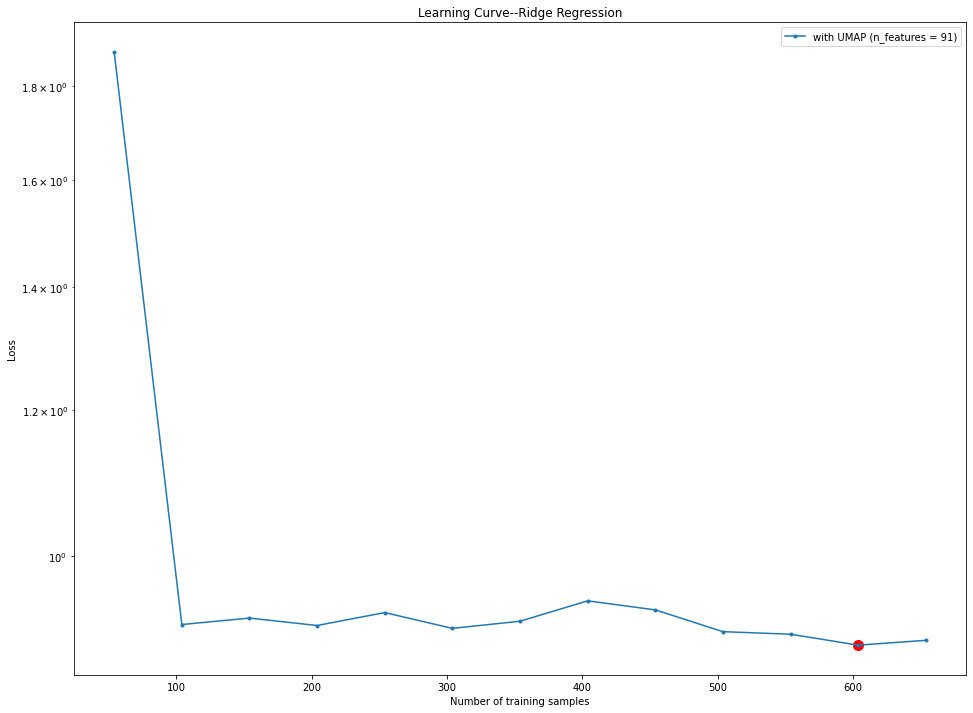

In [347]:
plt.figure(figsize=(16, 12))
plt.plot(numbers_train,losses_rr,'.-', label='with UMAP (n_features = {})'.format(optimal_n_features_UMAP))
plt.scatter(optimal_n_train_rr, min_loss_rr, s = 100,marker='o', color='r')
plt.xlabel('Number of training samples')
plt.yscale('log')
plt.ylabel('Loss')
plt.legend()
plt.title('Learning Curve--'+'Ridge Regression')
plt.show()

## Kernel Ridge Regression

### Optimization

#### Optimization of gamma

In [348]:
%%time
gammas =  np.logspace(-10, 1, 23)
losses_krr_gamma = np.zeros((len(gammas)))
kernel_params = {"kernel": "rbf", "gamma": 1.0}
for i,gamma in enumerate(gammas):
    kernel_params["gamma"] = gamma
    krr = KernelRidge(alpha = 1e-6, **kernel_params)
    krr.fit(T_train, Y_train)
    Y_pred = krr.predict(T_valid)
    loss = error(Y_valid, Y_pred)
    losses_krr_gamma[i] = loss
    print(gamma)

/home/s/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=8.62273e-10): result may not be accurate.
  overwrite_a=False)
/home/s/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/s/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/s/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/s/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarn

1e-10
3.1622776601683795e-10
1e-09
3.1622776601683795e-09
1e-08
3.162277660168379e-08


/home/s/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/s/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/s/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/s/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/s/anaconda3/lib/python3.7/site-pac

1e-07
3.162277660168379e-07
1e-06
3.162277660168379e-06
1e-05


/home/s/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/s/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/s/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/s/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/s/anaconda3/lib/python3.7/site-pac

3.1622776601683795e-05
0.0001
0.00031622776601683794
0.001
0.0031622776601683794
0.01
0.03162277660168379
0.1
0.31622776601683794
1.0
3.1622776601683795
10.0
CPU times: user 2.95 s, sys: 27.9 ms, total: 2.97 s
Wall time: 743 ms


/home/s/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=1.57254e-09): result may not be accurate.
  overwrite_a=False)
/home/s/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=5.7876e-09): result may not be accurate.
  overwrite_a=False)
/home/s/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=4.5115e-08): result may not be accurate.
  overwrite_a=False)


In [349]:
optimal_index_gamma_krr = np.unravel_index(losses_krr_gamma.argmin(), losses_krr_gamma.shape)
optimal_gamma_krr = gammas[optimal_index_gamma_krr]
print("Optimal gamma for KRR with UMAP is {} ".format(optimal_gamma_krr))

Optimal gamma for KRR with UMAP is 0.01 


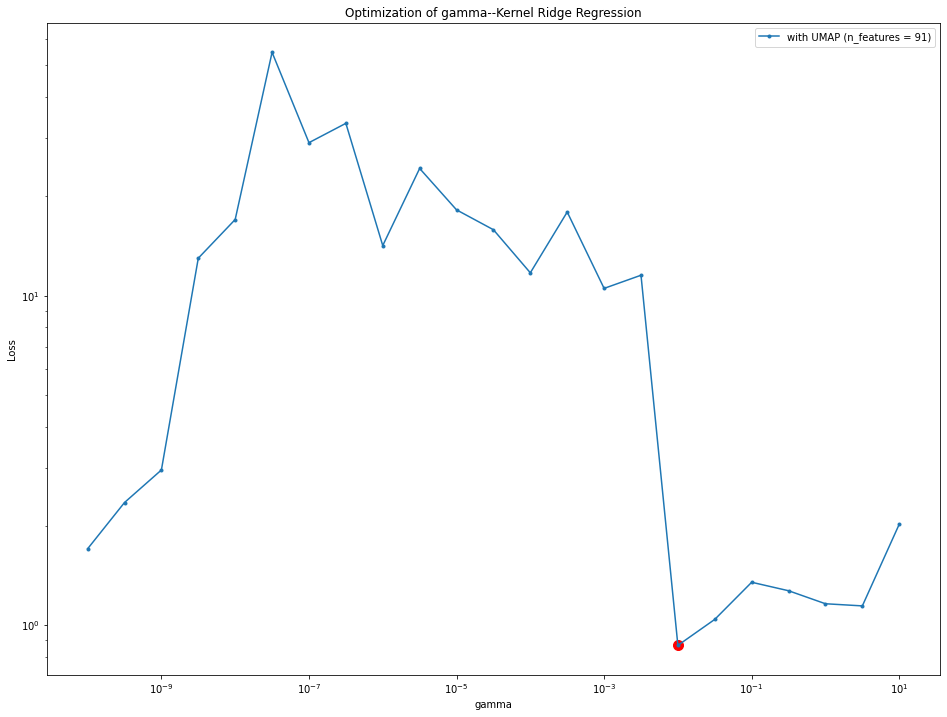

In [350]:
plt.figure(figsize=(16, 12))
plt.plot(gammas,losses_krr_gamma,'.-', label='with UMAP (n_features = {})'.format(optimal_n_features_UMAP))
plt.scatter(optimal_gamma_krr, losses_krr_gamma[optimal_index_gamma_krr], s = 100,marker='o', color='r')
plt.xlabel('gamma')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Loss')
plt.legend()
plt.title('Optimization of gamma--'+'Kernel Ridge Regression')
plt.show()

#### Optimization of alpha

In [351]:
%%time
alphas =  np.logspace(-10, 1, 23)
losses_krr_alpha = np.zeros((len(alphas)))
kernel_params = {"kernel": "rbf", "gamma": optimal_gamma_krr}
for i,alpha in enumerate(alphas):
    krr = KernelRidge(alpha = alpha, **kernel_params)
    krr.fit(T_train, Y_train)
    Y_pred = krr.predict(T_valid)
    loss = error(Y_valid, Y_pred)
    losses_krr_alpha[i] = loss
    print(alpha)

/home/s/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/s/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/s/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/s/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/s/anaconda3/lib/python3.7/site-pac

1e-10
3.1622776601683795e-10
1e-09
3.1622776601683795e-09
1e-08


/home/s/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/s/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/s/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/s/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=3.9377e-10): result may not be accurate.
  overwrite_a=False)
/home/s/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:188: LinAlgWar

3.162277660168379e-08
1e-07
3.162277660168379e-07
1e-06
3.162277660168379e-06
1e-05
3.1622776601683795e-05
0.0001
0.00031622776601683794
0.001
0.0031622776601683794
0.01
0.03162277660168379
0.1
0.31622776601683794
1.0
3.1622776601683795
10.0
CPU times: user 2.35 s, sys: 36 ms, total: 2.38 s
Wall time: 596 ms


In [352]:
optimal_index_alpha_krr = np.unravel_index(losses_krr_alpha.argmin(), losses_krr_alpha.shape)
optimal_alpha_krr = alphas[optimal_index_alpha_krr]
print("Optimal alpha for KRR with UMAP is {} ".format(optimal_alpha_krr))

Optimal alpha for KRR with UMAP is 3.1622776601683795e-05 


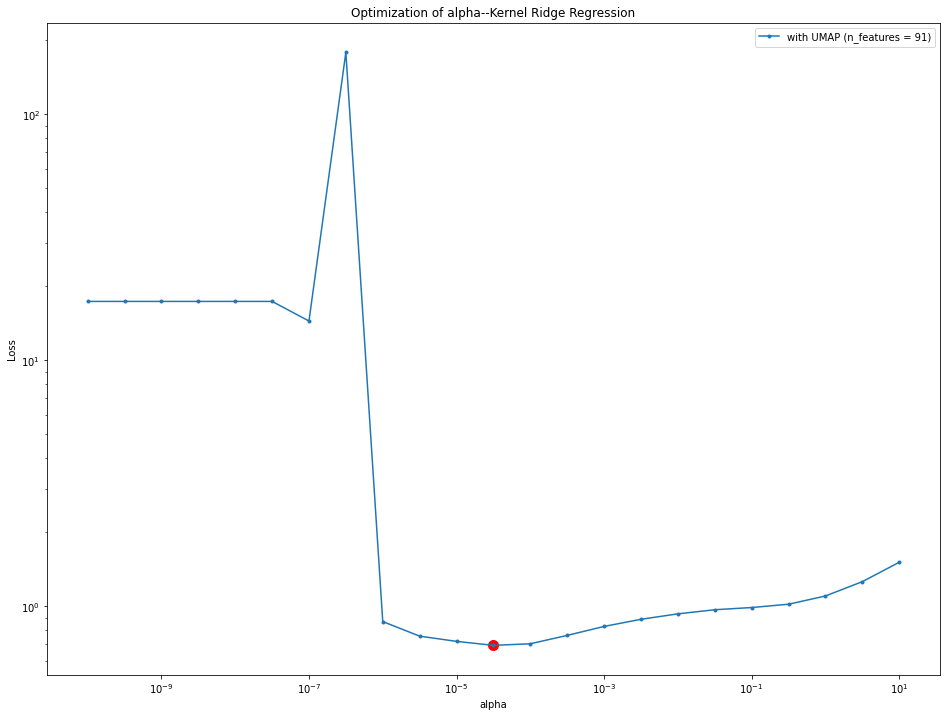

In [353]:
plt.figure(figsize=(16, 12))
plt.plot(alphas,losses_krr_alpha,'.-', label='with UMAP (n_features = {})'.format(optimal_n_features_UMAP))
plt.scatter(optimal_alpha_krr, losses_krr_alpha[optimal_index_alpha_krr], s = 100,marker='o', color='r')
plt.xlabel('alpha')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Loss')
plt.legend()
plt.title('Optimization of alpha--'+'Kernel Ridge Regression')
plt.show()

### Learning Curve

In [354]:
best_krr = KernelRidge(alpha = optimal_alpha_krr, **kernel_params)
numbers_train = np.arange(54,655,50)
losses_krr = np.zeros((len(numbers_train)))

In [355]:
%%time
for i,n in enumerate(numbers_train):
    Tt_train = T_ltrain[:n]
    Yt_train = Y_ltrain[:n]
    best_krr.fit(Tt_train,Yt_train)
    Y_pred = best_krr.predict(T_test)
    loss = error(Y_test, Y_pred)
    losses_krr[i] = loss
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
CPU times: user 537 ms, sys: 16 ms, total: 553 ms
Wall time: 139 ms


/home/s/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=4.02402e-08): result may not be accurate.
  overwrite_a=False)
/home/s/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=4.72154e-08): result may not be accurate.
  overwrite_a=False)
/home/s/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=4.42255e-08): result may not be accurate.
  overwrite_a=False)
/home/s/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=3.81561e-08): result may not be accurate.
  overwrite_a=False)
/home/s/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=2.80297e-08): result may not be accurate.
  overwrite_a=False)


In [356]:
losses_krr

array([1.69773979, 1.09455273, 1.17587238, 1.13678527, 1.13526463,
       0.97892264, 1.07847905, 1.05175541, 1.16993943, 1.16337427,
       1.18465723, 1.17652804, 1.18288255])

In [357]:
optimal_index_loss_krr = np.unravel_index(losses_krr.argmin(), losses_krr.shape)
optimal_n_train_krr = numbers_train[optimal_index_loss_krr]
min_loss_krr = losses_krr[optimal_index_loss_krr]
print("Minimum loss of KRR with UMAP is {} when number of train is {}  ".format(min_loss_krr,optimal_n_train_krr))

Minimum loss of KRR with UMAP is 0.9789226430430824 when number of train is 304  


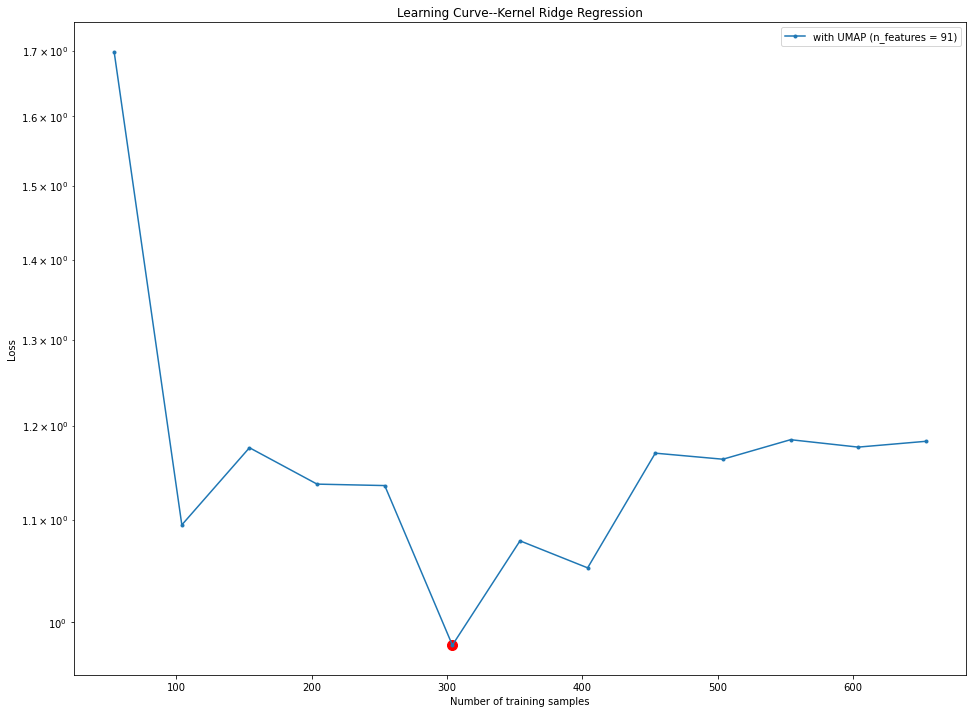

In [358]:
plt.figure(figsize=(16, 12))
plt.plot(numbers_train,losses_krr,'.-', label='with UMAP (n_features = {})'.format(optimal_n_features_UMAP))
plt.scatter(optimal_n_train_krr, min_loss_krr, s = 100,marker='o', color='r')
plt.xlabel('Number of training samples')
plt.yscale('log')
plt.ylabel('Loss')
plt.legend()
plt.title('Learning Curve--'+'Kernel Ridge Regression')
plt.show()

### Summary

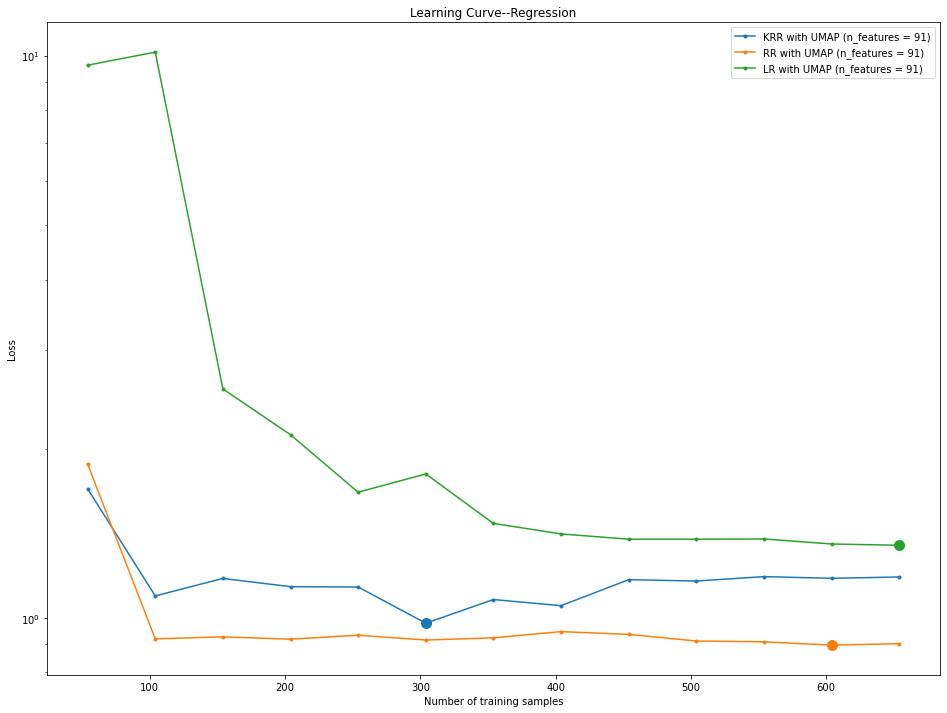

In [359]:
plt.figure(figsize=(16, 12))
plt.plot(numbers_train,losses_krr,'.-', label='KRR with UMAP (n_features = {})'.format(optimal_n_features_UMAP))
plt.scatter(optimal_n_train_krr, min_loss_krr, s = 100,marker='o')
plt.plot(numbers_train,losses_rr,'.-', label='RR with UMAP (n_features = {})'.format(optimal_n_features_UMAP))
plt.scatter(optimal_n_train_rr, min_loss_rr, s = 100,marker='o')
plt.plot(numbers_train,losses_lr,'.-', label='LR with UMAP (n_features = {})'.format(optimal_n_features_UMAP))
plt.scatter(optimal_n_train_lr, min_loss_lr, s = 100,marker='o')

plt.xlabel('Number of training samples')
plt.yscale('log')
plt.ylabel('Loss')
plt.legend()
plt.title('Learning Curve--'+'Regression')
plt.show()